# CSE 840 Mini-Project: Analysis of Bike Rental Dataset

### Due date: Sunday, April 21, 2024 (before midnight) 

### Total: 40 points

Note that this is an individual-level (not a group) project. The objective of this project is to train regression models for predicting the number of bikes rented in a given time period based on weather and other temporal information (time of day, season, etc). You are only allowed to use the standard python library along with the built-in functions in matplotlib, pandas, and numpy libraries to implement the code. You are also allowed to use only the train_test_split() and mean_squared_error functions in scikit-learn for the project. No other library functions are allowed (except for tqdm to monitor progress of your program execution). You must use the Jupyter notebook template provided here to write your program. Rename the notebook as **project_yourlastname.ipynb** and submit it to D2L. 

In [103]:
##########################################################
# List of libraries permitted to be used for the project
##########################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

##########################################################################################
# The following two functions can be used to split the data and evaluate your classifier.
# No other functions in scikit-learn library are permitted.
##########################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression    # This class and its functions are allowed only to double-check your answer. 

**Step 0:** Download the `BikeData.csv` file from D2L and load it into the Jupyter notebook. Observe that the dataset contains hourly number of bikes rented as well as weather information. Remove the rows for which the Rented Bike Count is 0 (these are days for which the rental system is not in service). Display the resulting dataframe.

In [104]:

data = pd.read_csv('BikeData.csv')

data = data[data['Rented Bike Count'] != 0]

data

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


## B. [10 points] DATA EXPLORATION

In this step, you need to write the code to perform exploratory analysis on the data. Specifically, your goal is to analyze the distribution of the target attribute to be predicted (i.e., Bike Rental Count) and its relationship to other attributes in the data.

**NOTE:** The figures below are for illustrative purposes only. They do not reflect the actual data.

**Step 1:** Draw a histogram (with 40 bins) to demonstrate the distribution of the hourly rental bike count. Calculate its mean and standard deviation.

Rented Bike Count:
Average = 729.1569994093326 , Standard deviation: 642.313223393375


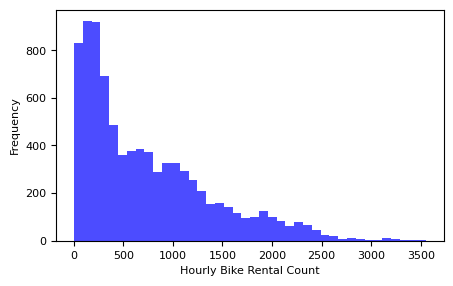

In [105]:
plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

print('Rented Bike Count:')

avg = np.mean(data['Rented Bike Count'])
std = np.std(data['Rented Bike Count'])

print('Average =', avg, ', Standard deviation:', std)

# Plot histogram of bike rental
plt.hist(data['Rented Bike Count'], bins=40, color='blue', alpha=0.7)
plt.show()
plt.close()



**Step 2:** Apply log transform on the hourly rented bike count and plot the resulting histogram. Calculate the mean and standard deviation of the log-transformed values and store them in variables named *log_avg* and *log_std*, respectively. Note that the two variables will be needed again later when applying inverse transform to calculate prediction error. 

Rented Bike Count (in logarithmic scale):
Average = 6.087200050530081 , Standard deviation: 1.1630027048630065


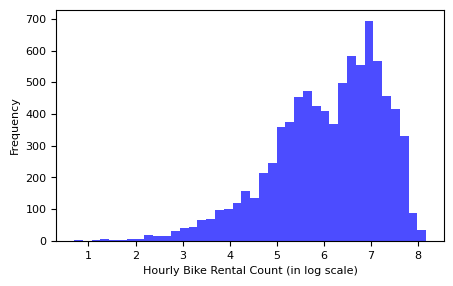

In [106]:
# Apply log to bike rental count and calculate its mean and standard deviation
log_avg = np.mean(np.log(data['Rented Bike Count']))
log_std = np.std(np.log(data['Rented Bike Count']))

print('Rented Bike Count (in logarithmic scale):')
print('Average =', log_avg, ', Standard deviation:', log_std)

plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count (in log scale)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Plot histogram of log (bike rental count)
plt.hist(np.log(data['Rented Bike Count']), bins=40, color='blue', alpha=0.7)
plt.show()
plt.close()


**Step 3:** Draw a line plot that shows the average number of bikes rented for each hour of the day. Identify the top-2 peak hours of bikes rented.   

Top two peak hours:
Hour
18    1554.016997
19    1235.776204
Name: Rented Bike Count, dtype: float64


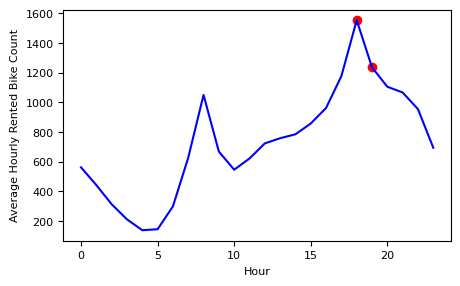

In [107]:
plt.figure(figsize=(5,3))
plt.xlabel('Hour', fontsize=8)
plt.ylabel('Average Hourly Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Draw line plot that shows the average number of bikes rented for each hour (from hour 0 to hour 23)
data.groupby('Hour')['Rented Bike Count'].mean().plot(color='blue')

# Identify the top two peak hours
peak_hours = data.groupby('Hour')['Rented Bike Count'].mean().nlargest(2)

print('Top two peak hours:')
print(peak_hours)

plt.scatter(peak_hours.index, peak_hours, color='red')

**Answer:** The two peaks are observed at 18  and  19

**Step 3:** Draw a bar chart that shows the average hourly number of bikes rented for each season. Based on the information, which is the peak season for bike rental?

Peak season: Summer


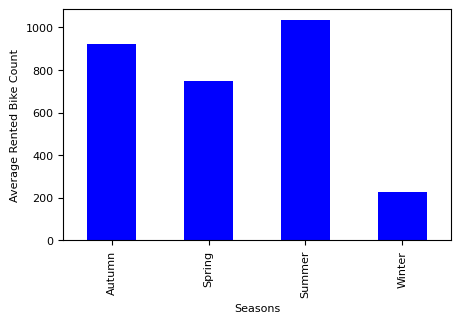

In [108]:
plt.figure(figsize=(5,3))
plt.xlabel('Season', fontsize=8)
plt.ylabel('Average Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Draw a bar chart that shows the average number of hourly bikes rented for each season (Spring, Summer, Autumn, Winter) 
data.groupby('Seasons')['Rented Bike Count'].mean().plot(kind='bar', color='blue')

peak_season = data.groupby('Seasons')['Rented Bike Count'].mean().idxmax()
print('Peak season:', peak_season)

The peak season is in summer.

**Step 4:** Draw a bar chart that compares the average number of bikes rented during holidays versus no holidays.

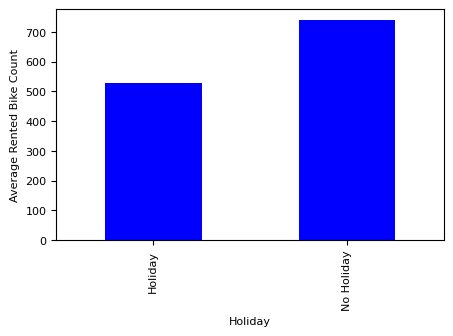

In [109]:
plt.figure(figsize=(5,3))
plt.xlabel('Holiday', fontsize=8)
plt.ylabel('Average Rented Bike Count', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Draw a bar chart that shows a comparison between the average number of hourly bikes rented during holidays and non-holidays
data.groupby('Holiday')['Rented Bike Count'].mean().plot(kind='bar', color='blue')

peak_holiday = data.groupby('Holiday')['Rented Bike Count'].mean().idxmax()


**Step 5:** For each weather-related attribute, draw a scatter plot to show the relationship between the weather attribute and number of bikes rented. Calculate the correlation associated with each plot and display it on the title of the figure.

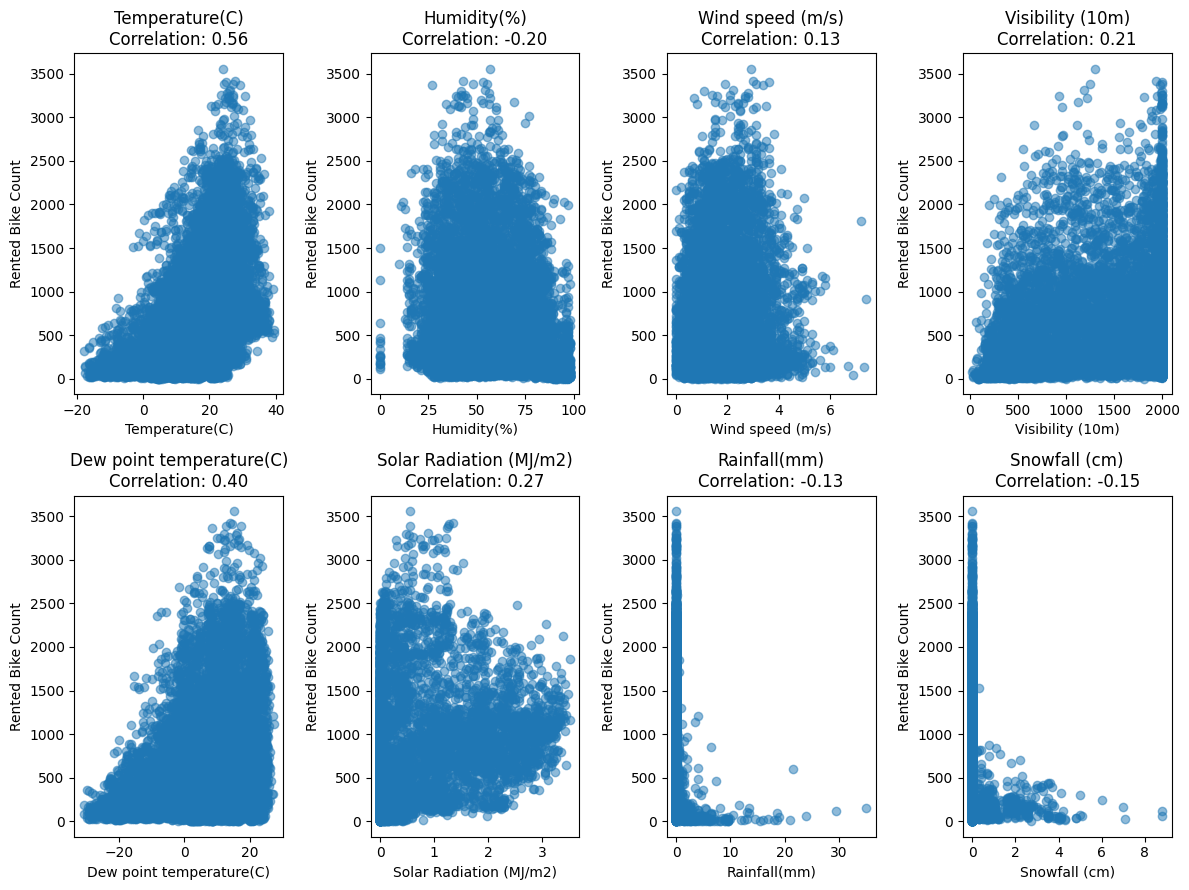

In [110]:
attrs = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

fig = plt.figure(figsize=(12,9))
for i in range(len(attrs)):
    ax = fig.add_subplot(2,4,i+1)

    ax.scatter(data[attrs[i]], data['Rented Bike Count'], alpha=0.5)
    
    correlation = data[attrs[i]].corr(data['Rented Bike Count'])

    ax.set_title(f'{attrs[i]}\nCorrelation: {correlation:.2f}')

    ax.set_xlabel(attrs[i])
    ax.set_ylabel('Rented Bike Count')


plt.tight_layout()

plt.show()



## C. [5 points] DATA PREPROCESSING

In this step, you need to write the code to perform exploratory analysis on the data.

**Step 6:** Write a function named `preprocess` that preprocesses the input Dataframe object in the following way:

1. Binarize the *Holiday* attribute as follows: 0 for *No Holiday* and 1 for *Holiday*.

2. Perform a one-hot-encoding on the *Seasons* attribute by creating 3 binary attributes: *Spring*, *Summer*, and *Autumn*, with *Seasons = Winter* corresponds to the case when all 3 binary attributes are 0.

3. Convert the Hour into Time of Day (Hour=0-5 to 0, Hour=6-11 to 1, Hour=12-17 to 2, and Hour=18-23 to 3), where 0 means midnight, 1 meeans morning, 2 means afternoon, and 3 means evening/night.  

4. Standardize all the weather attributes by subtracting each attribute with its mean and dividing by its standard deviation.

5. Perform a log transform on the *Rented Bike Count* attribute followed by standardization of the log values. 

The function should return the preprocessed data frame as its output.

In [111]:
def preprocess(df):
    """"
        Function to preprocess an input data frame
            Input: a dataframe
            Output: preprocessed dataframe            
    """

    df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
    
    # Perform one-hot encoding on the Seasons attribute, make values 0 or 1 rather than True or False
    seasons_encoded = pd.get_dummies(df['Seasons'], dtype=int)
    seasons_encoded.columns = ['Spring', 'Summer', 'Autumn', 'Winter']
    df = pd.concat([df, seasons_encoded], axis=1)
    
    # Convert Hour into Time of Day
    df['Time of Day'] = pd.cut(df['Hour'], bins=[0, 5, 11, 17, 23], labels=[0, 1, 2, 3], include_lowest=True)

    df = df.drop(['Hour', 'Seasons', 'Winter'], axis=1)
    
    # Standardize weather attributes
    weather_attrs = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
    for attr in weather_attrs:
        df[attr] = (df[attr] - df[attr].mean()) / df[attr].std()
    
    # Perform log transform on Rented Bike Count attribute
    df['Rented Bike Count'] = np.log(df['Rented Bike Count'])
    
    # Standardize log-transformed values
    df['Rented Bike Count'] = (df['Rented Bike Count'] - df['Rented Bike Count'].mean()) / df['Rented Bike Count'].std()
    
    

    
    return df

In [112]:
data2 = preprocess(data.copy())
data2

,Date,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Time of Day
0,1/12/2017,-0.472770,-1.484675,-1.032334,0.458402,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
1,1/12/2017,-0.661249,-1.509459,-0.983517,-0.895195,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
2,1/12/2017,-0.802967,-1.550766,-0.934701,-0.701824,0.929522,-1.634522,-0.654041,-0.132487,-0.17494,0,0,0,0,0
3,1/12/2017,-1.216066,-1.567289,-0.885884,-0.798509,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
4,1/12/2017,-1.487863,-1.550766,-1.081151,0.555088,0.929522,-1.702486,-0.654041,-0.132487,-0.17494,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,0.708083,-0.708096,-1.178784,0.845144,0.755481,-1.075711,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8756,30/11/2018,0.474062,-0.774188,-1.032334,0.555088,0.929522,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8757,30/11/2018,0.391439,-0.840279,-0.934701,-1.378622,0.876981,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8758,30/11/2018,0.413455,-0.881587,-0.837068,-0.701824,0.698014,-1.037954,-0.654041,-0.132487,-0.17494,0,1,0,0,3


## D. [25 points] PREDICTIVE MODELING

In this step, you need to write the code to implement two regression models: (1) multiple linear regression and (2) a multi-layer neural network to predict the rented bike count using weather and other timing information (time of day, season, and holiday). Your code must be implemented **using only functions provided by the numpy and python** standard library. You're not allowed to use `scikit-learn` (except for the functions listed in the first cell above), `pytorch`, `tensorflow`, `keras`, or other libraries to implement these steps.

**Step 7:** Extract the matrix of predictor attributes, **X**, and vector of target variable, **y** from the preprocessed dataframe. Use the *Rented Bike Count* as target variable to be predicted and the rest of the attributes (except for *Date*) as predictor attributes. Check to make sure that the size of your predictor attribute matrix matches the result shown below.

In [113]:
X = data2.drop(['Date', 'Rented Bike Count'], axis=1).values
y = data2['Rented Bike Count'].values

print('Shape of predictor matrix X:', X.shape)
print('Shape of target vector y:', y.shape)


Shape of predictor matrix X: (8465, 13)
Shape of target vector y: (8465,)


Use the code below to perform the following tasks:
1. Split the data into equal proportion of training and test examples. Use
2. Use scikit-learn implementation of linear regression to train the model from the training data.
3. Apply the model to the test data and report the root-mean-square-error on both training and test data. This will give you the baseline for performance comparison purposes. The code below also displays the model coefficients.

In [114]:
# Sample code to test correctedness of your dataset as input to a regression model
##################################################################################

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1234)

model = LinearRegression()
model.fit(X_train,y_train)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

print('\nModel performance on training set (log scale):')
Ypred = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, Ypred)))

print('\nModel performance on test set (log scale):')
Ypred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, Ypred)))

Model coefficients: [-0.32969887 -0.62425371 -0.03224495  0.00129382  0.86104208  0.01778358
 -0.19837171 -0.00921607 -0.33298031  0.71416205  0.45294771  0.49672373
  0.27593039]
Model intercept: -0.8101390496800746

Model performance on training set (log scale):
0.6235214347292307

Model performance on test set (log scale):
0.6007506635270667


**Step 8** Write a function to perform inverse transform on the target attribute. Specifically, given an input vector $\mathbf{z}$ along with the `log_avg` and `log_std` values (computed in Step 2 above), the function will:
1. unnormalize the values of the target variable.
2. Apply the exponential function to convert the values back to their original scale.

Specifically, the inverse transformation to be computed by the function is:
$$y_i = \exp\left[z_i * log\_std + \log\_avg\right]$$
since
$$z_i = \frac{\log y_i - \log\_avg}{\log\_std}$$

The function will return a vector of the transformed values of z.

In [115]:
def invTransform(z, avg, stdev):
    y = np.exp(z * stdev + avg)
    return y
     

Apply the inverse transform function to the ground truth and predicted values of the target attribute. Use the transformed values to compute the root mean square error in terms of the original scale of the target attribute (i.e., prior to normalization and log-transform).

In [116]:
print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):
453.2996354686649

Model performance on test set (original scale):
442.22976999901834


### 1. [9 points] Multiple Linear Regression with QR Decomposition

**Step 10:**  Write an implementation of the multiple linear regression (MLR) approach using QR decomposition (with Gram-Schmidt orthogonalization). Specifically, MLR will learn the regression coefficients $\mathbf{w}$ by solving the following normal equation:
$$\mathbf{X}^T\mathbf{X} \mathbf{w} = \mathbf{X}^T\mathbf{y}$$
Note that you must add a column of 1s to the matrix $\mathbf{X}$ before solving the normal equation. In doing so, one of the elements of $\mathbf{w}$ will correspond to the model intercept, $w_0$. By setting the matrix $\mathbf{A} = \mathbf{X}^T\mathbf{X}$ and vector $\mathbf{b} = \mathbf{X}^T\mathbf{y}$, we can use QR Factorization to solve $\mathbf{Aw} = \mathbf{b}$ for $\mathbf{w}$ (see lecture 10). 

Define a class named `QR_LinearRegression` that contains the following 4 functions:
1. QR() - this function will take an input matrix A and returns an orthogonal matrix $\mathbf{Q}$ and upper triangular matrix $\mathbf{R}$ as its output.
2. backsubstitution() - this function will take an upper triangular matrix $\mathbf{U}$ and a vector $\mathbf{b}$ as its input. It will then solve $\mathbf{Uw} = \mathbf{b}$ using the backsubstitution approach described in lecture 8.
3. fit() - this function will take an input predictor matrix $\mathbf{X}$ and target vector $\mathbf{y}$ as its input and calculates the solution of the normal equation given above.
4. predict() - this function will take a predictor matrix $\mathbf{X}$ as input and returns a vector of predicted values using the formula below:
   $$\hat{y} = \mathbf{X}\mathbf{w}$$

In [117]:
class QR_LinearRegression():
    """
    Implementation of multiple linear regression using Gram-Schmidt orthogonalization.     
    """
    def __init__(self):
        self.w = None

    def QR(self, A):
        m, n = A.shape
        Q = np.zeros((m, m))
        R = np.zeros((m, n))

        for j in range(n):
            v = A[:, j]
            for i in range(j):
                R[i, j] = np.dot(Q[:, i], A[:, j])
                v = v - R[i, j] * Q[:, i]
            R[j, j] = np.sqrt(np.dot(v, v))
            Q[:, j] = v / R[j, j]
       
        
        return (Q, R)

    def backsubstitution(self, U, b):

        n = U.shape[0]
        w = np.zeros((n, 1))
        for i in range(n-1, -1, -1):
            w[i] = (b[i] - np.dot(U[i, i+1:], w[i+1:])) / U[i, i]
        
        return w
   
    def fit(self, X, y):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is no of training examples and d is no of predictor attributes
                y: N x 1 binary vector of target attributes.

            Output: 
                None
                        
            The function will compute the model parameters and store them as local variables: self.coef and self.intercept.

        """    
        X = np.hstack((np.ones((X.shape[0],1)), X))

        A = np.dot(X.T, X)
        b = np.dot(X.T, y)

        Q, R = self.QR(A)

        w = self.backsubstitution(R, np.dot(Q.T, b))     
        
        self.coef = w[1:]
        self.intercept = w[0]
                
    def predict(self, X):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #data points and d is #predictor attributes

            Output: 
                Y_pred: N x 1 vector containing the predicted value of each data point 
        """    

        X = np.hstack((np.ones((X.shape[0],1)), X))
        Y_pred = np.dot(X, np.vstack((self.intercept, self.coef)))

        
        return Y_pred

**(a)** Fit the model to the training data. Print the regression coefficients (they should be consistent with the output of scikit-learn).

In [118]:
model = QR_LinearRegression()
model.fit(X_train, y_train)


print('Model coefficients:', model.coef)
print('Model intercept:', model.intercept[0])


Model coefficients: [[-0.32969887]
 [-0.62425371]
 [-0.03224495]
 [ 0.00129382]
 [ 0.86104208]
 [ 0.01778358]
 [-0.19837171]
 [-0.00921607]
 [-0.33298031]
 [ 0.71416205]
 [ 0.45294771]
 [ 0.49672373]
 [ 0.27593039]]
Model intercept: -0.8101390496827158


**(b)** Apply the model to both training and test sets. Report the model performance in terms of its root-mean-square error (in its original scale).

In [119]:
print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):
453.29963546926797

Model performance on test set (original scale):
442.2297699992326


### 2. [15 points] Multi-layer Neural network

This step requires you to implement a fully-connected neural network of arbitrary depth to solve the regression problem. For each layer you will implement a `forward` and a `backprop` function  separately. The `forward` function will receive input vector $\mathbf{x}$ from its previous layer and returns an output activation corresponding to $$\mathbf{a} = \sigma\left[\mathbf{W}\mathbf{x} + \mathbf{b}\right],$$ where $\sigma(\cdot)$ is the activation function while $\mathbf{W}$ and $\mathbf{b}$ are the model parameters associated with the given layer. The `backprop` function receives the gradients from its next layer and use them to compute the gradients with respect to the inputs and weights. The network should be trained to minimize the squared loss function, i.e., $\ell(\hat{y}, y) = (y - \hat{y})^2$, where $\hat{y}$ is the predicted value. For all hidden layers of the network, the user can specify the number of hidden nodes and type of activation function as hyper-parameters.

**Step 7:** You will need to implement two classes: `Layer` and `MultiLayerNet`. The `Layer` class contains implementation for a single layer in the multi-layer network. The layer must store the following parameters:
- `self.activation_type`: which takes either the value `ReLU`, `sigmoid`, or `linear`
- `self.W`: this corresponds to the weight matrix W associated with the neural network
- `self.b`: this corresponds to the bias parameter of the neural network

The class also contains implementation of the `forward` and `backprop` functions that correspond to computations of the forward pass and backward pass of the neural network layer (see lecture notes for details). 

In [195]:
class Layer(object):
    """
    
    Implementation of a single layer in a multi-layer neural network. 
    
    """

    def __init__(self, input_dim, output_dim, activation_type='linear'):
        """"        
            Input:  
                input_dim: dimension of its input attributes
                output_dim: dimension of its output
                activation_type: 'ReLU', 'sigmoid', or 'linear' (default = 'linear')
 
            This function should store the activation_type and creates two variables:
            - self.W: a matrix of size output_dim x input_dim to represent the weight parameter of the neural network
            - self.b: a vector of length output_dim to represent the bias parameter of the neural network
            
            You should initialize self.W randomly from a Gaussian distribution with mean 0 and standard deviation (scale) 
            equals to 0.1. On the other hand, the bias term, self.b, can be initialized to 0.
            
        """    
        
        self.activation_type =  activation_type
        self.W = np.random.normal(0, 0.1, (output_dim, input_dim))
        self.b = np.zeros((output_dim, 1))
    
    def activation(self, z):
        if self.activation_type == 'linear':
            return z
        
        elif self.activation_type == 'sigmoid':
            return 1 / (1 + np.exp(-z))

        elif self.activation_type == 'ReLU':
            return np.maximum(0, z)

    # Gradient of the activation function (From lecture 17)
    def activation_derivative(self, z):
        if self.activation_type == 'linear':
            return 1
        elif self.activation_type == 'ReLU':
            return (z > 0) * 1
        elif self.activation_type == 'sigmoid':
            sig = self.activation(z)
            return sig * (1 - sig)

    def forward(self, x):
        """
            This function computes the forward propagation step of a layer in the neural network. 
            
            Input:  
                x: a vector whose length should be equal to input_dim

            Output:
                a: output activation.

            The output activation for a given input vector x is computed as follows: a = sigma[Wx + b], 
            where sigma is the activation function. The output activation will be stored locally as self.a 
            and returned as an output of the function.

        """        
        self.z = np.dot(self.W, x) + self.b
        
        # ** sigma(Wx + b) function **
        self.a = self.activation(self.z)

        return self.a
    
    def backprop(self, x, delta_l, next_layer = None):
        """
           This function performs the backward propagation step of the neural network. Specifically,
           it calculates the gradient of the loss function with respect to the weight and bias parameters
           and stores them as self.grad_W and self.grad_b, respectively.
            
            Input:  
                x: input vector corresponding either to the input data or output activation from its previous layer
                delta_l: loss back-propagated from its next layer.
                next_layer: next layer object, which is needed to update delta_l.

            Output:
                delta_l: gradient to be transmitted to its previous layer
                
            Note:
            1. If next_layer=None, this implies it is the last layer of the multi-layer neural network. 
            2. The formula for computing the gradient delta_l depends on the activation function (linear, RELU, or sigmoid).
            3. The update formula for self.W and self.b also depends on the activation function (linear, RELU, or sigmoid).

        """

        self.grad_W = np.dot(delta_l, x.T)
        self.grad_b = delta_l
        
        if next_layer is not None:
            delta_l = np.dot(next_layer.W.T, delta_l) * self.activation_derivative(self.z)
        
        return delta_l

In [181]:
class MultiLayerNet(object):
    """
   
       Implementation of a multi-layer neural network.
       
    """
    
    def __init__(self, layers, learning_rate = 0.001, epochs = 50):
        """"        
            Input:  
                layers: a list of layers associated with the multi-layer neural network.
                learning_rate: learning rate for gradient descent algorithm.
                epochs: maximum number of epochs to train the neural network.

            This function should store the input variables locally as self.layers, self.learning_rate,
            and self.epochs. These variables are needed when the network performs forward and back propagation. 
            
        """    
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
    

    def forward(self,x):
        """
            This function computes the forward propagation step of the multi-layer neural network. 
            Given an input vector x, it will apply the forward function of the first layer and
            passes its output activation as an input to the next layer. This will continue until the 
            forward function of the last layer of the network is invoked to generate the predicted value. 
            
            Input:  
                x: an input vector of predictor attribute values.

            Output:
                y_pred: predicted value given by the output activation of the last layer of the network. 

        """
        y_pred = x

        for layer in self.layers:
            y_pred = layer.forward(y_pred)

        return y_pred
    
    def loss_derivative(self, y_pred, y):
        return 2 * (y - y_pred)

    def backprop(self, x, y):
        """
            This function implements the backward propagation step of the multi-layer neural network. 
            Starting from the last layer, it computes the gradient of the loss function and back-propagates 
            the gradient to its previous layer and repeat the process until the gradient of the first
            layer is computed. 
            
            Input:  
                x: input vector.
                y: ground truth target value.
                
        """
        y_pred = self.forward(x)

        delta = self.loss_derivative(y_pred, y)

        # Backpropagate
        for layer in reversed(self.layers):
            delta = layer.backprop(layer.a, delta)
            #x = layer

    
    def loss(self, y_hat, y):
        """
            This function computes the squared error loss given the ground truth and predicted value of a data point.
            
            Input: 
                y: ground truth value.
                y_hat: predicted value. 
        
            Output:
                Squared-error loss.
        """
        return np.mean((y - y_hat) ** 2)
    
    def fit(self, X, Y, plot_loss = False):
        """
            This function is invoked when training the neural network model.
        
            Input:
                X: A 2-d numpy array consisting of the predictor attribute values of the training data  
                Y: A numpy array vector consisting of the target class labels of the training data
                plot_loss: A True/False value. It will display the average loss at each epoch average if set to True. 
        """
        loss_hist = []

        for epoch in range(self.epochs):
            for x, y in zip(X, Y):
                # Compute the predicted value
                # Ensure that the input data is reshaped to a column vector
                y_pred = self.forward(x)
                self.backprop(x, y)

                # Update the weights and bias
                for layer in self.layers:
                    i = layer.W + self.learning_rate * layer.grad_W
                    layer.W -= i

                    j = layer.b + self.learning_rate * layer.grad_b
                    layer.b -= j

            # Compute the loss
            loss = self.loss(self.predict(X), y)
            loss_hist.append(loss)
        
        if plot_loss:
            plt.plot( loss_hist )
            plt.xlabel('epoch')
            plt.ylabel('Loss')
            plt.title('loss')                   
        
    def predict(self, X):
        """
            This function is used to predict the output value of any input data X. Specifically,
            for each data point, it will call the forward() function to calculate the
            output activation of the last layer of the neural network. 

            Input:
                X: A 2-dimensional numpy array of predictor attribute values. 

            Output:
                Y_hat: A numpy array that contains the predicted value of the input data.
        """

        Y_hat = np.array([self.forward(x) for x in X])      
        
        return Y_hat

**(a)** Create a 3-layer network and train the neural network to predict the number of bikes rented. The architecture of the 3 layer network is as follows:

    - Hidden layer 1: #hidden nodes = 10, activation function = sigmoid
    - Hidden layer 2: #hidden nodes = 5, activation function = ReLU
    - Output layer: #output nodes = 1, activation function = linear
    
Set the learning rate to 0.001 and maximum epoch to be 100. You can also try other configuration and look for the best possible result. 

In [196]:
layers = [Layer(X_train.shape[1],10,'sigmoid'),Layer(10,5,'ReLU'),Layer(5,1,'linear') ]
model = MultiLayerNet(layers, learning_rate= 0.005, epochs =100)
model.fit(X_train, y_train, plot_loss = True )

ValueError: operands could not be broadcast together with shapes (10,13) (1,10) 

**(b)** Apply the model to the training and test data and report their performance.

In [290]:
print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):


ValueError: Found array with dim 3. None expected <= 2.